### 3b. Parametric surface, partial derivatives, normal to the surface, TP-equation


**Parametric surface, partial derivatives, normal to the surface, tangent plane equation.  
(SymPy, NumPy, plotting with Matplotlib)**

**Problem.** Find an equation for the tangent plane to the surface $z =-x^2 + -y^2$ at the point (-1,-1,-2).  ~[Sch49/26]

The surface is an downward-opening paraboloid, the apex of which is at the origin. Let $\vec{R0}$ be the position vector pointing to the point (1,-1,-2) on the surface and let $\vec{n}$ be the normal vector of the surface at this point. Let $\vec{r}$ be the position vector pointing to an arbitrary point of the tangent plane.  Thus the vector $\vec{r}-\vec{R0}$ is lying on the tangent plane.
The equation for the tangent plane is obtained from the perpendicularity condition $ (\vec{r}-\vec{R0})\cdot \vec{n} = 0 $.


In [1]:
# TANGENT PLANE

# INIT
from sympy import *
from sympy.vector import CoordSys3D
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
x, y, z = symbols('x y z')           # Coordinate variables
u, v    = symbols('u v')             # Parameter variables
C = CoordSys3D('C')                  # Defines a standard coordinate system
r = x*C.i + y*C.j + z*C.k            # Position vector to the points on the tangent plane.
                                     

# INPUT
z = -x**2 - y**2                     # The equation of the surface in explicit form
P = [-1, -1, -2 ]                    # The point on the surface where the tangent plane is formed

# CALCULATE
R0 = P[0]*C.i + P[1]* C.j + P[2]*C.k            # Position vector to the surface at point P

# Normal
zp = z.subs([(x, u), (y, v)])                   # Coordinate variable z parameterized 
R = x.subs(x,u)*C.i + y.subs(y,v)*C.j + zp*C.k # The parameterized pos.vector of the surface
R_du = diff(R, u)                             # Partial derivatives of .. 
R_dv = diff(R, v)                             #  the position vector .
R_du0 = R_du.evalf(subs={u: P[0], v: P[1]})  # Partial derivatives.. 
R_dv0 = R_dv.evalf(subs={u: P[0], v: P[1]})  #  at the point P
n = R_du0.cross(R_dv0)                      # The cross product of the partial derivatives..
                                                #  gives the normal vector. (Not unit vector)

# Extract scalar components of normal vector n for quiver plotting:
P1 = C.origin.locate_new('P1', n)           # New coordinate system; origin to n
V1 = list(P1.express_coordinates(C))        # List of components of normal vector n    
      
# Equation for the tangent plane is obtained from the peendicularity condition of the normal n..
#  and the tangentplane vector r-R0. r is the position vector to the points on the tangent plane.
EQ = Eq((r-R0).dot(n), 0)                      # Equation for the tangent plane  
                                   
# Solve z from tangent plane equation
x, y, z = symbols('x y z')          
z1 = solve(EQ, z)       # z1 gives an expression to calculate the z values of the tangent plane.
                         # Solve gives a list of solutions (here only one solution).
print('Tangent plane z =', z1[0])   # The equation for the tangent plane  at point P.
                        

Tangent plane z = 2.0*x + 2.0*y + 2.0


In [2]:
# TEST PRINTING
# Printing the equation of the tangent plane
print('Normal vector n: ', n)
print('Components of n:', V1)
print()
print('The equation of the tangent plane on the surface z =', z, ' at the point', P,':')
print('Tangent plane z =', z1[0])   # The equation for the tangent plane  at point P.
print(EQ)                 # The equation for the tangent plane to the surface at point P.
EQ

Normal vector n:  (-2.0)*C.i + (-2.0)*C.j + 1.0*C.k
Components of n: [-2.00000000000000, -2.00000000000000, 1.00000000000000]

The equation of the tangent plane on the surface z = z  at the point [-1, -1, -2] :
Tangent plane z = 2.0*x + 2.0*y + 2.0
Eq(-2.0*x - 2.0*y + 1.0*z - 2.0, 0)


Eq(-2.0*x - 2.0*y + 1.0*z - 2.0, 0)

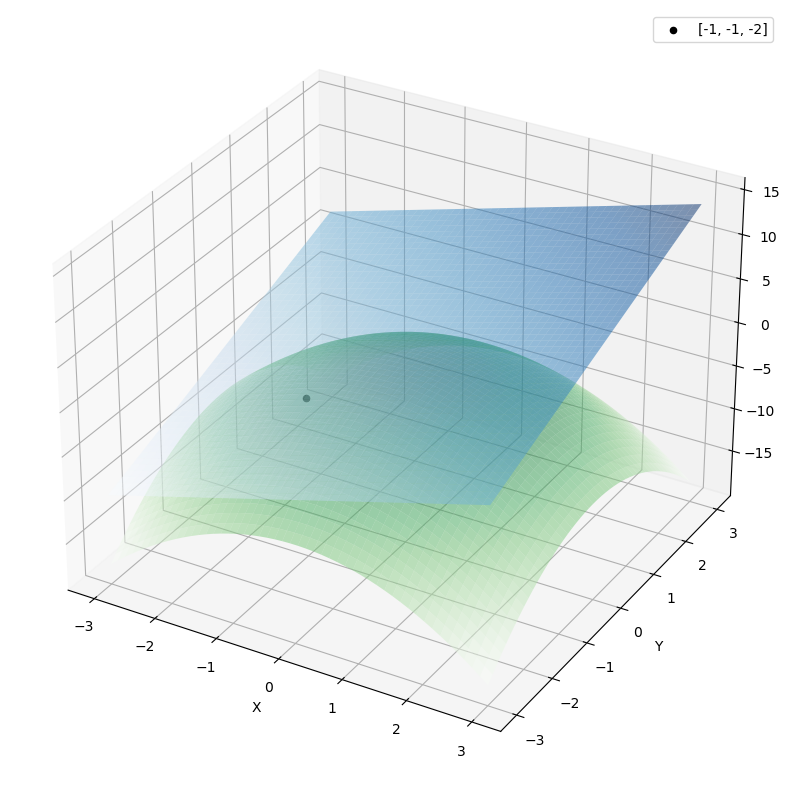

In [3]:
# Plotting with Matplotlib

# INPUT! Place here the expressions to calculate z for the surface and the tangent plane.
z2 = lambda x2, y2: (-x2**2 - y2**2)                             # z values for the surface
z3 = lambda x2, y2: (2*x2 +2*y2 + 2)                             # z values for the tangent plane

fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection = '3d')                                 # Draws the coordinate system

# Axis markings
ax.set_xlabel('X')                 
ax.set_ylabel('Y')
ax.set_zlabel('Z')

x1 = np.linspace(-3, 3)                                          # The set of values for x
y1 = np.linspace(-3, 3)
[x2, y2] = np.meshgrid(x1, y1)                                   # (x,y) lattice points


ax.plot_surface(x2, y2, z2(x2, y2), alpha=0.5, cmap = 'Greens')  # Surface  z2 = z2(x2, y2)
ax.plot_surface(x2, y2, z3(x2, y2), alpha=0.5, cmap = 'Blues')   # Plane    z3 = z3(x2, y2)         

#quiver1 = ax.quiver(P[0], P[1], P[2],  V1[0],V1[1],V1[2],  color='r', linewidths=3, label = 'n')
ax.scatter(P[0], P[1], P[2], color='k', linewidths=1, label = P)            # Tangent point

ax.legend()
plt.show() 

